In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e4/sample_submission.csv
/kaggle/input/playground-series-s4e4/train.csv
/kaggle/input/playground-series-s4e4/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test_data  = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
submission_data = pd.read_csv('/kaggle/input/playground-series-s4e4/sample_submission.csv')

In [4]:
print(train_data.shape)
print(test_data.shape)
print(submission_data.shape)

(90615, 10)
(60411, 9)
(60411, 2)


In [5]:
train_data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [6]:
test_data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [7]:
Sex_hue = train_data['Sex'].unique()

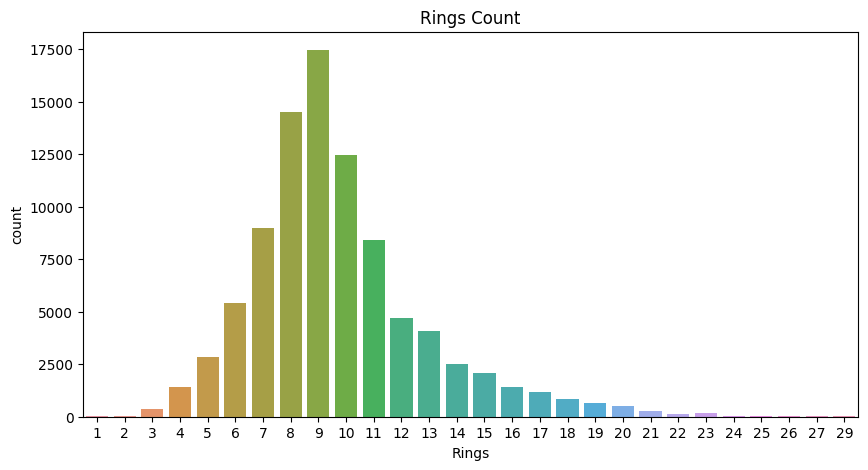

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_data['Rings'],width =.8)
plt.title("Rings Count")
plt.show()

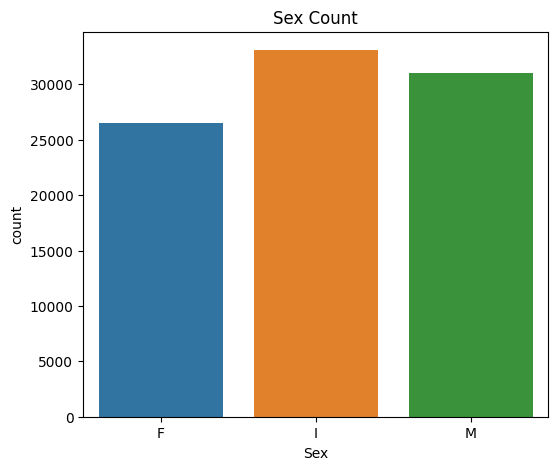

In [9]:
plt.figure(figsize=(6,5))
sns.countplot(x=train_data['Sex'],width =.8)
plt.title("Sex Count")
plt.show()

In [10]:
data = train_data.drop(['id'],axis=1)

<Figure size 1000x1000 with 0 Axes>

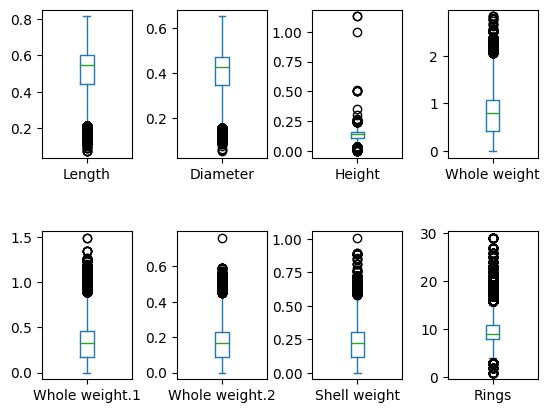

In [11]:
plt.figure(figsize=(10,10))
data.plot(kind ='box',subplots= True , layout =(2,4),sharex=False ,sharey= False)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

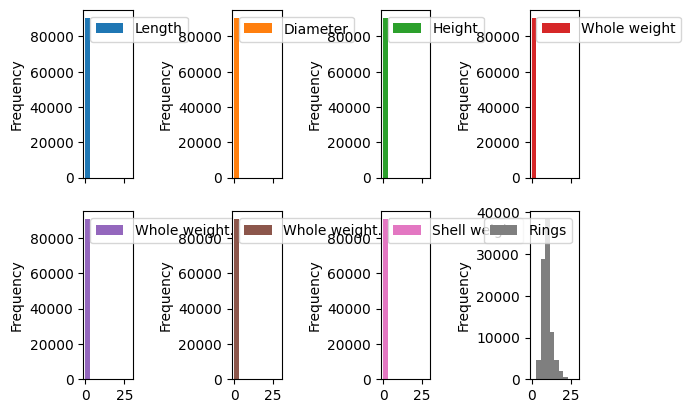

In [12]:
data.plot(kind = 'hist', subplots= True , layout =(2,4))
plt.subplots_adjust(hspace=0.2, wspace=2)
plt.show()

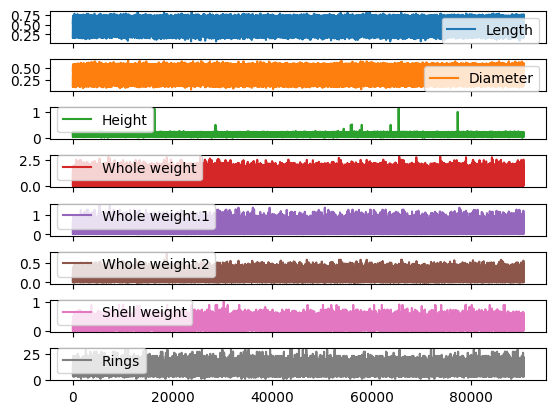

In [13]:
data.plot(subplots=True)
plt.subplots_adjust(hspace=0.5)
plt.show()

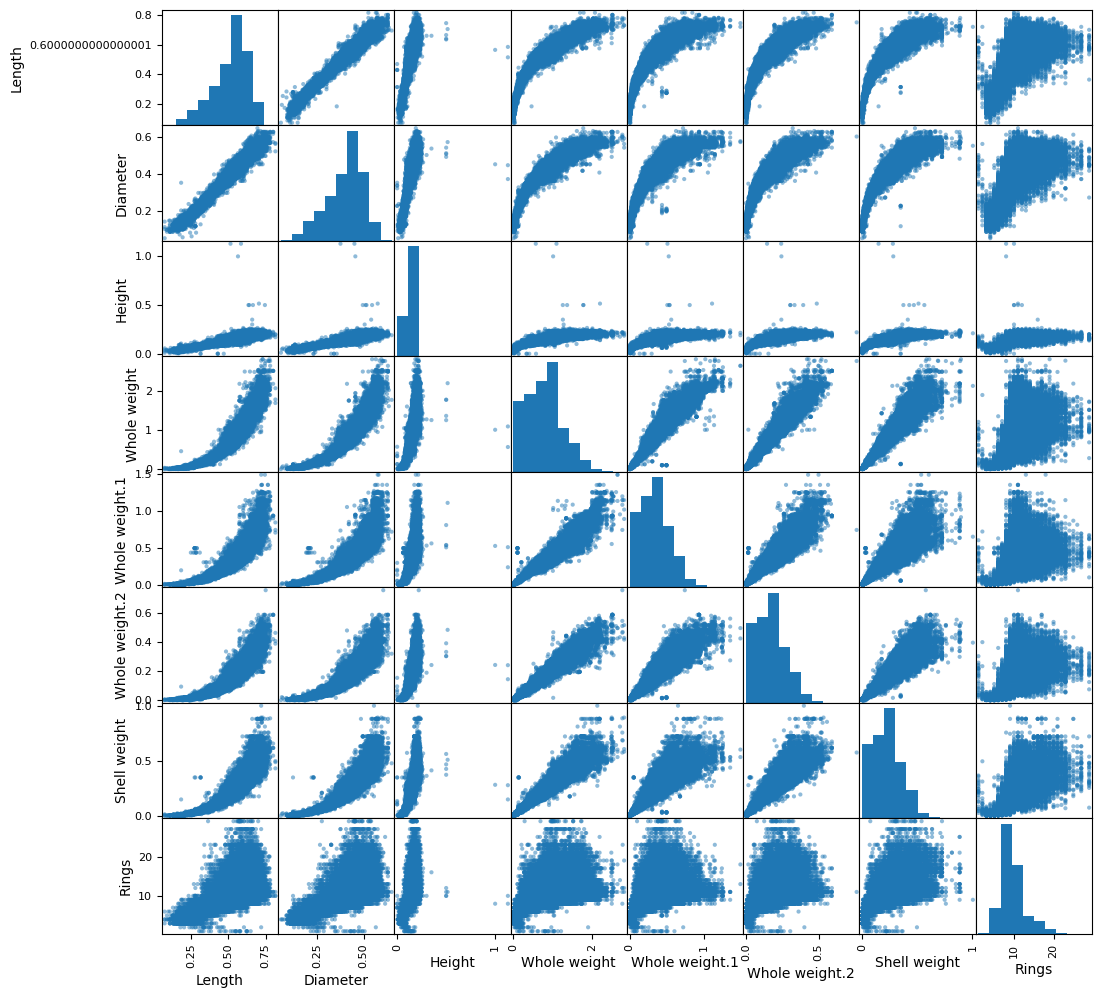

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(12,12))
plt.show()

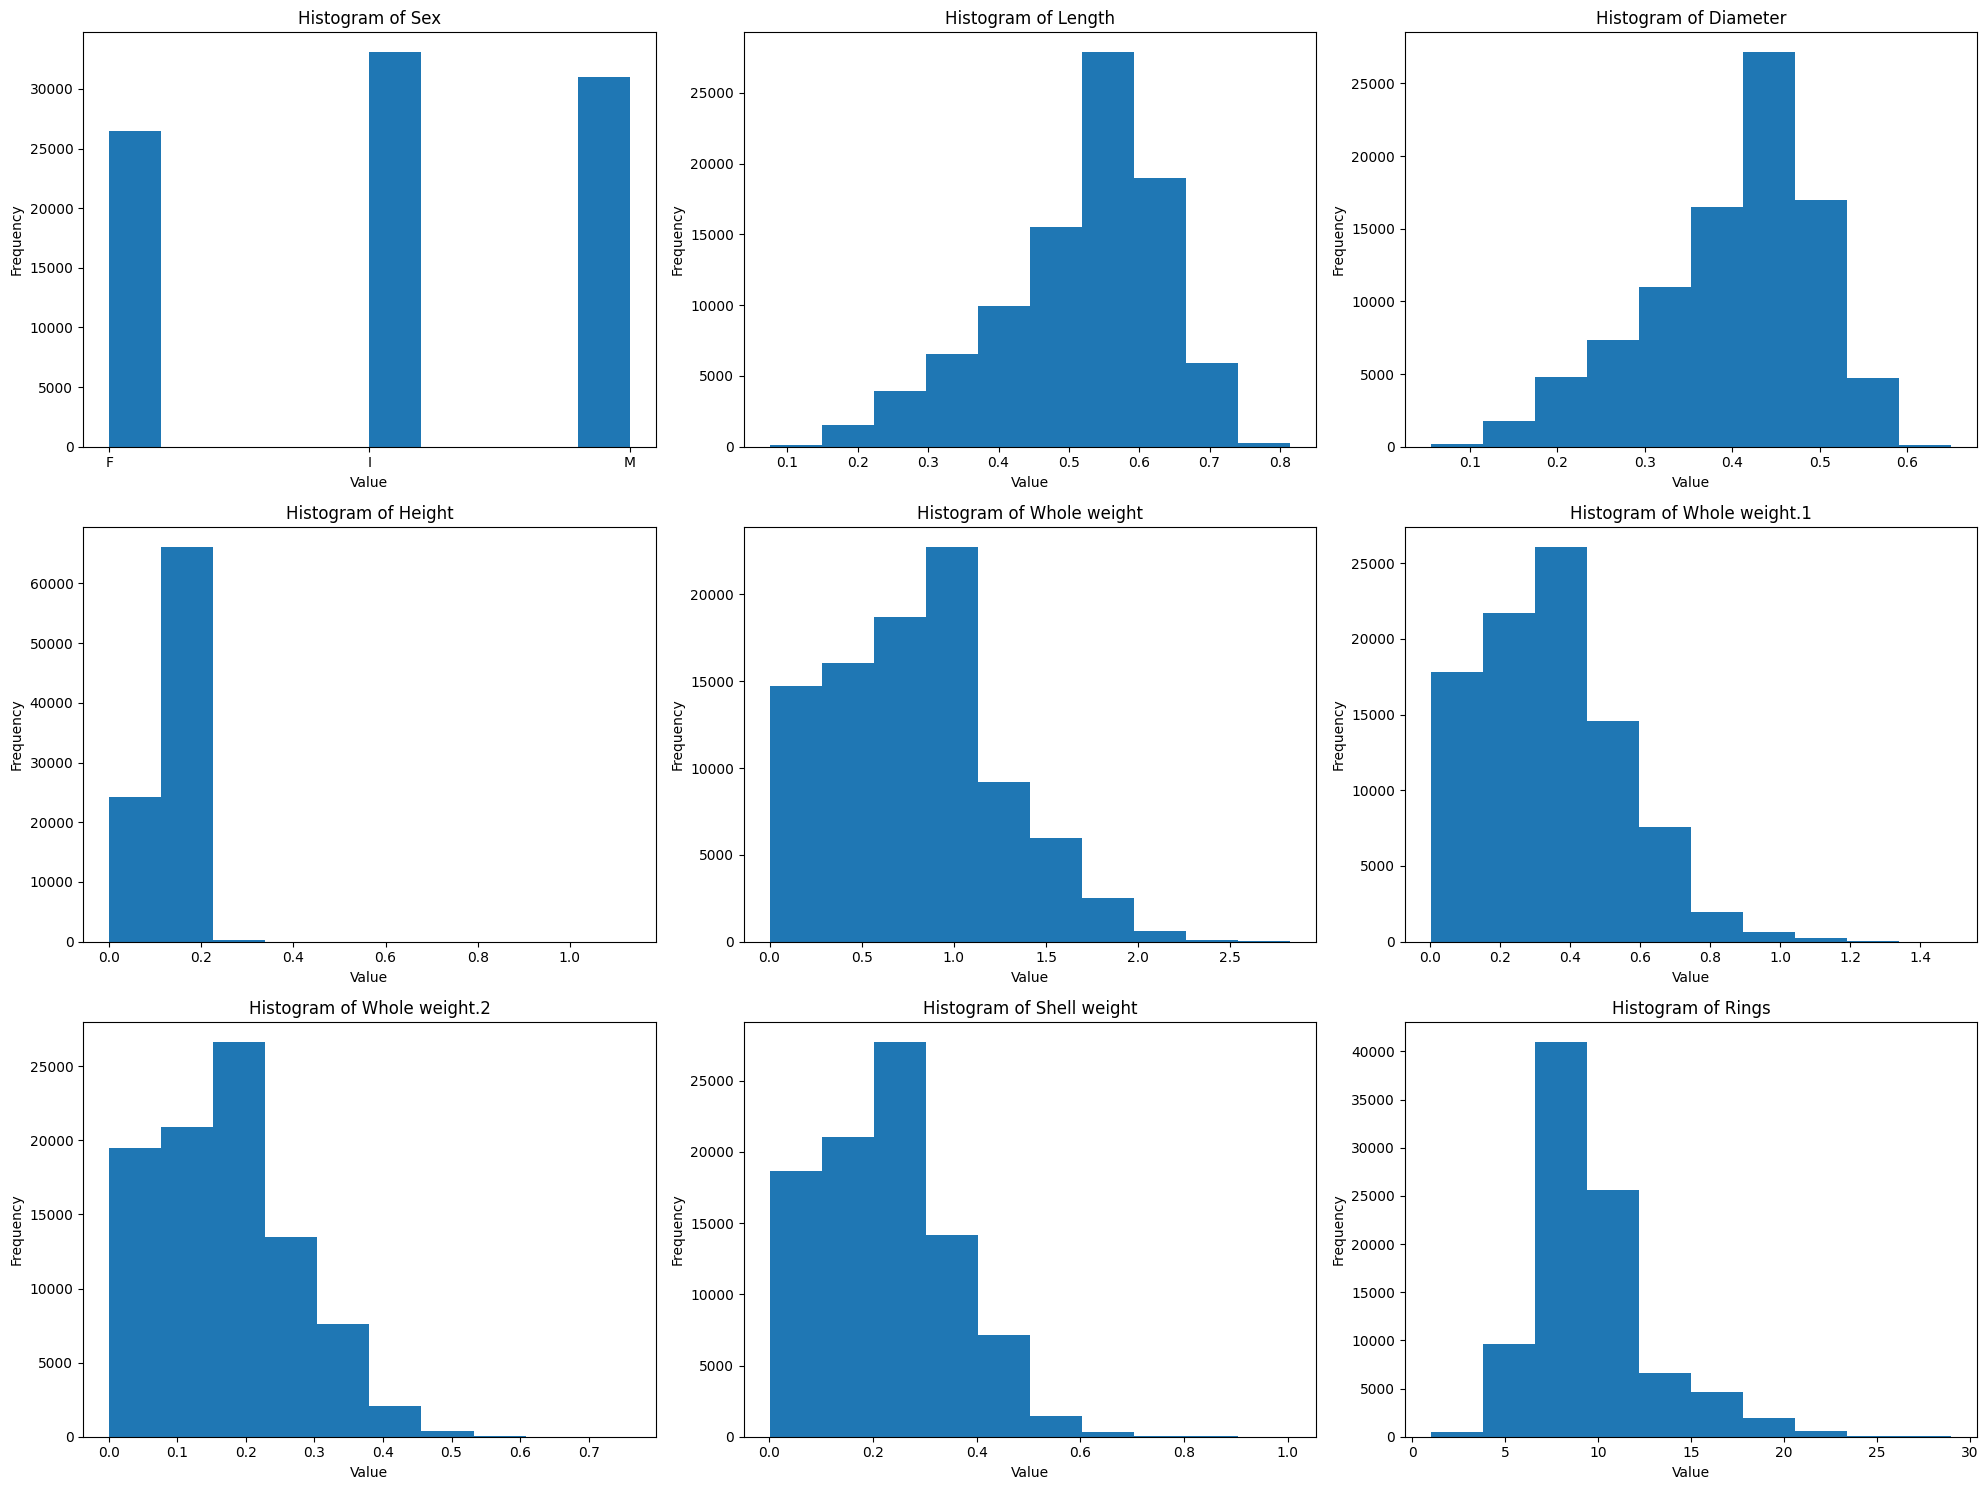

In [15]:
num_cols = len(data.columns)
num_rows = int(np.ceil(num_cols / 3))  #ensure that there are enough rows to accommodate all columns

fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))
for i, col in enumerate(data.columns):
    ax = axs[i // 3, i % 3] 
    ax.hist(data[col], bins=10) 
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
X = train_data.drop(['Rings'],axis=1)
y = train_data['Rings']
X.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [17]:
Sex = pd.get_dummies(data['Sex'],dtype=int,drop_first=True)
Sex.head()

,I,M
0,0,0
1,0,0
2,1,0
3,0,1
4,1,0


In [18]:
X = X.drop(['Sex'],axis=1)
X.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975


In [19]:
X = pd.concat([X,Sex],axis=1)
X.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,I,M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,0,0
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,0,0
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,1,0
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,0,1
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,1,0


In [20]:
test_data  = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')

In [21]:
test = test_data.copy()
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [22]:
test_data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [23]:
test_data = test_data.drop(['Sex'],axis=1)

In [24]:
test_data.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [25]:
Gen = pd.get_dummies(test['Sex'],dtype=int,drop_first=True)
Gen.head()

,I,M
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [26]:
test_data = pd.concat([test_data,Gen],axis=1)

In [27]:
test_data.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,I,M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0,1
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0,1
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0,1
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0,1
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,1,0


In [28]:
X.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,I,M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,0,0
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,0,0
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,1,0
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,0,1
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,1,0


In [29]:
import sklearn
from sklearn import metrics
sklearn.metrics.get_scorer_names() 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [30]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
import catboost

In [32]:
from catboost import CatBoostRegressor
CBR = CatBoostRegressor()
CBR.fit(X,y)

Learning rate set to 0.083448
0:	learn: 3.0452400	total: 71.1ms	remaining: 1m 11s
1:	learn: 2.9330872	total: 81.6ms	remaining: 40.7s
2:	learn: 2.8250112	total: 91.8ms	remaining: 30.5s
3:	learn: 2.7303048	total: 103ms	remaining: 25.7s
4:	learn: 2.6440208	total: 114ms	remaining: 22.8s
5:	learn: 2.5707941	total: 125ms	remaining: 20.8s
6:	learn: 2.5013103	total: 136ms	remaining: 19.3s
7:	learn: 2.4424332	total: 147ms	remaining: 18.2s
8:	learn: 2.3895117	total: 157ms	remaining: 17.3s
9:	learn: 2.3444518	total: 168ms	remaining: 16.6s
10:	learn: 2.3044441	total: 181ms	remaining: 16.2s
11:	learn: 2.2669172	total: 192ms	remaining: 15.8s
12:	learn: 2.2354568	total: 203ms	remaining: 15.4s
13:	learn: 2.2063876	total: 215ms	remaining: 15.1s
14:	learn: 2.1786625	total: 225ms	remaining: 14.7s
15:	learn: 2.1578514	total: 235ms	remaining: 14.4s
16:	learn: 2.1358959	total: 245ms	remaining: 14.2s
17:	learn: 2.1163501	total: 256ms	remaining: 14s
18:	learn: 2.1004913	total: 268ms	remaining: 13.8s
19:	learn

In [33]:
prediction = CBR.predict(test_data)

In [34]:
prediction

array([ 9.54130708,  9.68570687, 10.21527365, ..., 11.98684971,
       13.70618977,  8.48828685])

In [35]:
if np.any(prediction < 0):
    print("The array contains negative values.")
else:
    print("The array does not contain negative values.")

The array does not contain negative values.


In [36]:
submission_data.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


In [37]:
id = submission_data['id']

In [38]:
True_values = submission_data['Rings']

In [39]:
from sklearn.metrics import make_scorer, mean_squared_error
from math import sqrt
rmsle = np.sqrt(mean_squared_error(True_values,prediction))
rmsle

2.620902822738398

In [40]:
submission = pd.DataFrame({'id':id, 'Rings': prediction})
submission.to_csv('submission.csv', index=False)

In [41]:
submission

,id,Rings
0,90615,9.541307
1,90616,9.685707
2,90617,10.215274
3,90618,10.571179
4,90619,7.612584
...,...,...
60406,151021,6.353190
60407,151022,9.744644
60408,151023,11.986850
60409,151024,13.706190
